11490434/11490434 [==============================] - 1s 0us/step


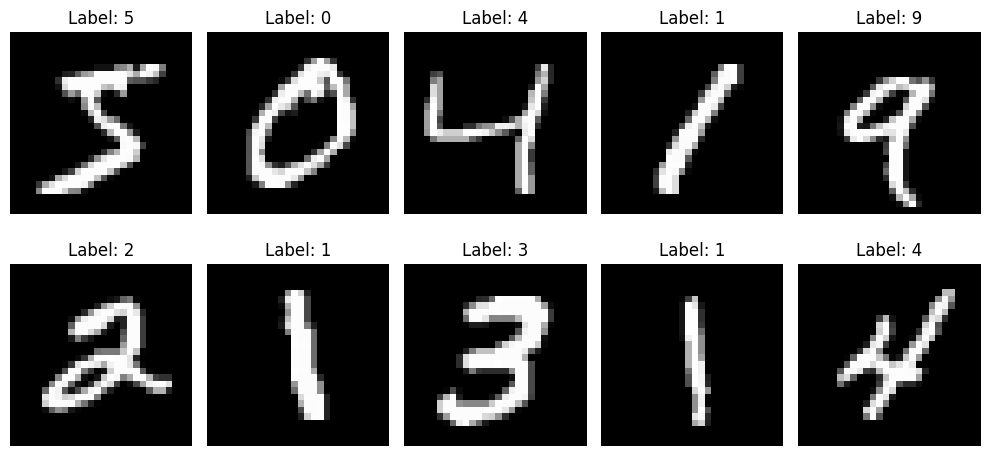

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Завантаження даних MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Нормалізація даних (масштабування до діапазону [0, 1])
X_train = X_train / 255.0
X_test = X_test / 255.0

# Відображення декількох зображень для перевірки
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 0.2593 - accuracy: 0.9253 - val_loss: 0.1363 - val_accuracy: 0.9609
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1132 - accuracy: 0.9659 - val_loss: 0.0936 - val_accuracy: 0.9717
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0769 - accuracy: 0.9764 - val_loss: 0.0872 - val_accuracy: 0.9720
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0572 - accuracy: 0.9824 - val_loss: 0.0733 - val_accuracy: 0.9765
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0442 - accuracy: 0.9863 - val_loss: 0.0751 - val_accuracy: 0.9772
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0345 - accuracy: 0.9894 - val_loss: 0.0699 - val_accuracy: 0.9777
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0271 - accuracy: 0.9919 - val_loss: 0.0719 - val_accuracy:

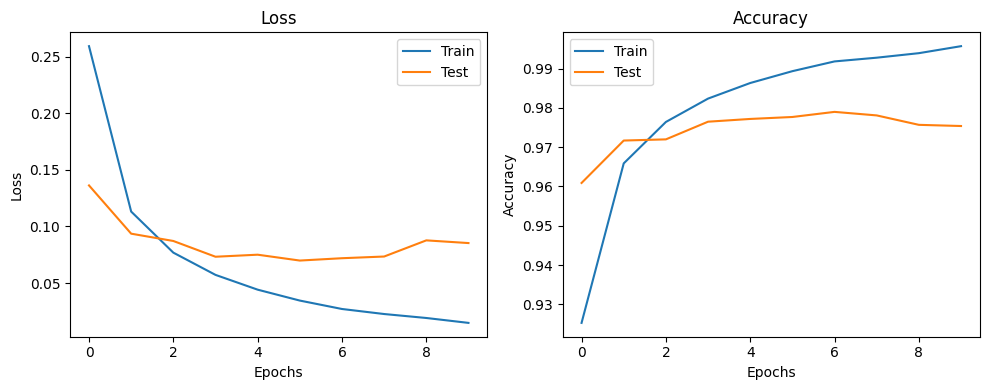

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Створення моделі нейронної мережі
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Перетворення матриці зображення у вектор
    Dense(128, activation='relu'),  # Повнозв'язний шар з 128 нейронами та функцією активації ReLU
    Dense(10, activation='softmax')  # Вихідний шар з 10 нейронами (відповідно до кількості класів) та softmax
])

# Компіляція моделі
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Тренування моделі
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))
# Оцінка ефективності моделі на тестовому наборі даних
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

# Візуалізація результатів
import matplotlib.pyplot as plt

# Графік функції втрат
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()

# Графік точності
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
